# **Penjelasan Challenge**


**Studi Kasus: Visualisasi data**

Studi kasus ini bertujuan untuk menganalisis dataset yang berhubungan dengan prediksi diabetes, dengan fokus pada distribusi dan korelasi fitur-fitur tertentu yang relevan. Langkah pertama dalam eksplorasi data adalah mengimpor dataset yang tersedia melalui URL. Dataset ini kemudian dibersihkan dengan menghapus kolom yang dianggap tidak relevan, seperti 'SkinThickness' dan 'BloodPressure', untuk memfokuskan analisis pada fitur-fitur yang lebih signifikan.

**Dataset**

1. Pregnancies: Jumlah kehamilan yang pernah dialami.
2. Glucose: Konsentrasi glukosa plasma dari tes toleransi glukosa oral.
3. BloodPressure: Tekanan darah diastolik dalam mm Hg.
4. BloodPressure: Tekanan darah diastolik dalam mm Hg.
5. SkinThickness: Ketebalan lipatan kulit triceps dalam mm.
6. Insulin: Kadar insulin serum selama 2 jam (mu U/ml).
7. BMI: Indeks Massa Tubuh (kg/m²).
8. DiabetesPedigreeFunction: Probabilitas diabetes berdasarkan riwayat keluarga.
9. Age: Usia pasien dalam tahun.
10. Outcome: Diagnosis diabetes (0: Tidak diabetes, 1: Diabetes).

#Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import io
import base64

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#Read Data

Membaca dataset dengan pandas, dataset yang akan digunakan dalam bentuk csv

Link dataset = https://drive.google.com/uc?export=download&id=1UrXdSo9xQ0OT-X3osJxVEWf_q4m5C5xG

In [4]:
# URL dataset
url = "https://drive.google.com/uc?export=download&id=1UrXdSo9xQ0OT-X3osJxVEWf_q4m5C5xG"

# Membaca dataset
dataset = pd.read_csv(url)

**Drop unnecessary columns**

Hapus kolom yang tidak relevan ('SkinThickness' dan 'BloodPressure') untuk menyederhanakan analisis.

In [5]:
dataset = dataset.drop(columns=['SkinThickness', 'BloodPressure'])

In [6]:
# Menampilkan 10 baris pertama dari dataset
print(dataset.head(10))

   Pregnancies  Glucose  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148        0  33.6                     0.627   50        1
1            1       85        0  26.6                     0.351   31        0
2            8      183        0  23.3                     0.672   32        1
3            1       89       94  28.1                     0.167   21        0
4            5      116        0  25.6                     0.201   30        0
5            3       78       88  31.0                     0.248   26        1
6            4      110        0  37.6                     0.191   30        0
7           10      168        0  38.0                     0.537   34        1
8           10      139        0  27.1                     1.441   57        0
9            5      166      175  25.8                     0.587   51        1


**Create boxplots for Glucose and BMI**

Buat boxplot untuk melihat distribusi dan outlier pada kolom 'Glucose' dan 'BMI'.

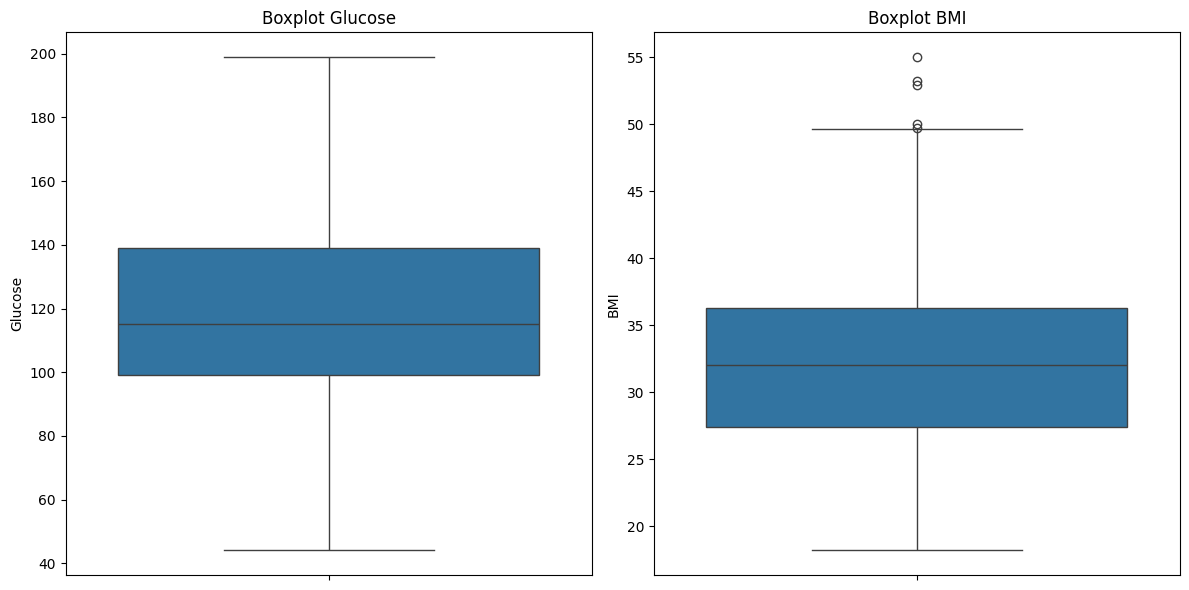

In [7]:
plt.figure(figsize=(12, 6))
# Boxplot 'Glucose'
plt.subplot(1, 2, 1)
sns.boxplot(y=dataset['Glucose'])
plt.title('Boxplot Glucose')
# Boxplot 'BMI'
plt.subplot(1, 2, 2)
sns.boxplot(y=dataset['BMI'])
plt.title('Boxplot BMI')
plt.tight_layout()
plt.show()


**Hasil Interpretasi :**

*   **Boxplot Glucose**

    Berdasarkan hasil visualisasi data pada kolom Glucose dapat diketahui bahwa tidak terdapat outlier pada data Glucose dengan median berada di sekitar 110 - 120 yang menunjukkan pusat data. Lalu, Rentang interkuartil (IQR) cukup luas, menunjukkan variabilitas yang moderat. Kemudian Nilai minimum berada diangka 40, sedangkan nilai maksimum mendekati 200. Selain itu, Whisker bawah dan atas mencakup sebagian besar data tanpa adanya nilai ekstrem. Kolom Glucose tidak memiliki outlier yang signikan, sehingga data terlihat cukup bersih.

*   **Boxplot BMI**

    Berdasarkan hasil visualisasi data pada kolom BMI dapat diketahui bahwa data BMI memiliki beberapa outlier di sisi atas (lebih dari 50). Median pada data BMI berada di sekitar 32, dengan rentang IQR yang cukup lebar, sehingga menunjukkan variasi data yang besar. Kemudian pada whisker bagian atas ditemukan Outlier yang menunjukkan adanya individu dengan nilai BMI yang jauh lebih tinggi dari distribusi utama. Sehingga perlu dianalisis lebih lanjut untuk menentukan apakah outlier tersebut disebabkan oleh kesalahan data atau merupakan karakteristik yang sebenarnya.




**Outcome distribution using matplotlib**

Buat pie chart dengan matplotlib untuk menunjukkan distribusi kelas pada kolom 'Outcome'.

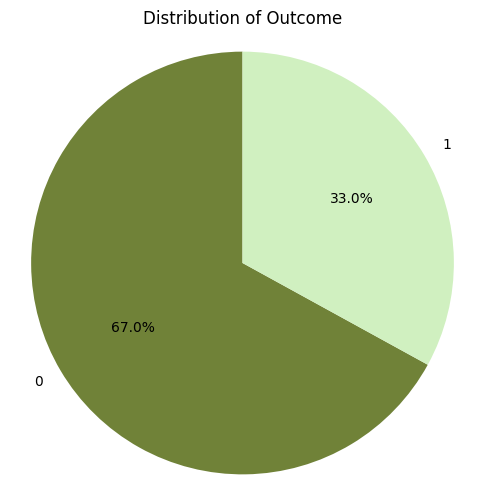

In [8]:
outcome_counts = dataset['Outcome'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90, colors=['#708238', '#D0F0C0'])
plt.title('Distribution of Outcome')
plt.axis('equal')
plt.show()

**Hasil Interpretasi :**

Berdasarkan hasil visualisasi data distribution of outcome diagnosis diabetes, dapat diketahui bahwa 67% individu dalam dataset didiagnosis
tidak memiliki diabetes (kategori 0) dan 33% individu didiagnosis memiliki diabetes (kategori 1). Ini menunjukkan bahwa mayoritas individu
dalam dataset tidak memiliki diabetes.

**Outcome distribution using plotly**

Buat pie chart interaktif menggunakan plotly untuk distribusi kolom 'Outcome'.

In [11]:
fig = px.pie(names=outcome_counts.index, values=outcome_counts.values, title='Distribution of Outcome', color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

**Hasil Interpretasi :**

Berdasarkan hasil distribusi kolom Outcome, diketahui bahwa proporsi Label 0 (Tidak diabetes) berjumlah 461 individu dengan proporsi sebesar 67%. Sehingga menunjukkan sebagian besar data dalam dataset menunjukkan individu yang tidak menderita diabetes. Sedangkan Label 1 (Diabetes), menunjukkan jumlah individu yang menderita diabetes sebanyak 227 individu dengan proporsi sebesar 33%. Dataset menunjukkan ketidakseimbangan (imbalanced data) antara label 0 dan 1. Label 0 lebih dominan dengan proporsi dua kali lipat dari label 1. Ketidakseimbangan ini dapat memengaruhi model pembelajaran mesin jika digunakan untuk klasikasi yang membuat model mungkin bias terhadap kelas mayoritas (0). Diperlukan strategi seperti oversampling untuk kelas minoritas (misalnya, SMOTE) atau undersampling untuk kelas mayoritas untuk mengatasi ketidakseimbangan.